In [1]:
%pylab
%matplotlib inline
import pandas as pd

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('winemag-data_first150k.csv')

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [5]:
df.columns[1]

'country'

In [6]:
df['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [7]:
country_lst = df['country'].astype(str)
country_lst = country_lst[country_lst != 'nan']
country_uni = country_lst.unique()

In [8]:
country_uni

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [9]:
country_lst = country_lst.tolist()
coun_fre = [country_lst.count(i) for i in country_uni]

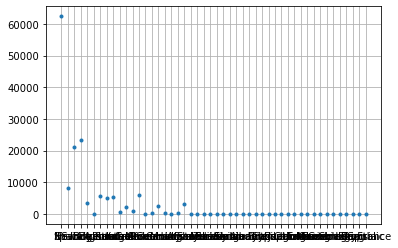

In [10]:
plt.plot(country_uni, coun_fre, '.')
plt.grid()

In [11]:
country_dict = {country_uni[i]:coun_fre[i] for i in range(len(coun_fre))}
country_dict

{'US': 62397,
 'Spain': 8268,
 'France': 21098,
 'Italy': 23478,
 'New Zealand': 3320,
 'Bulgaria': 77,
 'Argentina': 5631,
 'Australia': 4957,
 'Portugal': 5322,
 'Israel': 630,
 'South Africa': 2258,
 'Greece': 884,
 'Chile': 5816,
 'Morocco': 12,
 'Romania': 139,
 'Germany': 2452,
 'Canada': 196,
 'Moldova': 71,
 'Hungary': 231,
 'Austria': 3057,
 'Croatia': 89,
 'Slovenia': 94,
 'India': 8,
 'Turkey': 52,
 'Macedonia': 16,
 'Lebanon': 37,
 'Serbia': 14,
 'Uruguay': 92,
 'Switzerland': 4,
 'Albania': 2,
 'Bosnia and Herzegovina': 4,
 'Brazil': 25,
 'Cyprus': 31,
 'Lithuania': 8,
 'Japan': 2,
 'China': 3,
 'South Korea': 4,
 'Ukraine': 5,
 'England': 9,
 'Mexico': 63,
 'Georgia': 43,
 'Montenegro': 2,
 'Luxembourg': 9,
 'Slovakia': 3,
 'Czech Republic': 6,
 'Egypt': 3,
 'Tunisia': 2,
 'US-France': 1}

# Encode the data from string to float

In [4]:
def Encode_dict(arr):
    arr = arr.astype(str)
    arr = arr[arr != 'nan']
    arr_uni = arr.unique()
    num = np.arange(1, len(arr_uni)+1)
    return {arr_uni[i]:num[i] for i in range(len(arr_uni))}

def StrEncoder2int(arr):
    arr_dict = Encode_dict(arr)
    encoder = np.zeros(arr.shape)
    for key, val in arr_dict.items():
        encoder[np.where(arr == key)] = val
    return encoder

In [44]:
uni = Encode_dict(df['country'])

In [49]:
enCountry = StrEncoder2int(df['country'])

In [50]:
enCountry

array([1., 2., 1., ..., 4., 3., 4.])

# Add new column

In [78]:
df2 = pd.DataFrame(df['country'])

In [80]:
df2['Encountry'] = enCountry

In [81]:
df2

,country,Encountry
1.0,Spain,1.0
2.0,US,2.0
1.0,Spain,1.0
1.0,Spain,1.0
3.0,US,3.0
...,...,...
4.0,France,4.0
3.0,US,3.0
4.0,France,4.0
3.0,US,3.0


# Select useful columns

In [85]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [8]:
UsefulDf = df.drop(df.columns[[0]], axis=1)

In [9]:
UsefulDf

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [10]:
def EncodeMultiColums(df, *expt):
    dfNew = df
    colName = df.columns
    for i in colName:
        if i in expt:
            continue
        else:
            encoder = StrEncoder2int(df[i])
            dfNew['Encode'+i] = encoder
    return dfNew

In [11]:
UsefulEncodeDf = EncodeMultiColums(UsefulDf, 'points')

D:\Anaconda_Nevigator\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [12]:
UsefulEncodeDf

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Encodecountry,Encodedescription,Encodedesignation,Encodeprice,Encodeprovince,Encoderegion_1,Encoderegion_2,Encodevariety,Encodewinery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,2.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1.0,3.0,3.0,0.0,1.0,3.0,2.0,3.0,3.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.0,4.0,4.0,0.0,3.0,4.0,3.0,4.0,4.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,3.0,5.0,5.0,0.0,4.0,5.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,4.0,62376.0,0.0,0.0,33.0,246.0,0.0,38.0,899.0
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,3.0,62377.0,842.0,0.0,24.0,45.0,0.0,112.0,12363.0
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,4.0,62378.0,19810.0,0.0,33.0,246.0,0.0,38.0,3104.0
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,3.0,62379.0,22769.0,0.0,24.0,45.0,0.0,112.0,7951.0


In [13]:
# UsefulEncodeDf.to_csv('usefulwine_150k_all.csv', index=False)

In [14]:
UsefulEncodeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   country            150925 non-null  object 
 1   description        150930 non-null  object 
 2   designation        105195 non-null  object 
 3   points             150930 non-null  int64  
 4   price              137235 non-null  float64
 5   province           150925 non-null  object 
 6   region_1           125870 non-null  object 
 7   region_2           60953 non-null   object 
 8   variety            150930 non-null  object 
 9   winery             150930 non-null  object 
 10  Encodecountry      150930 non-null  float64
 11  Encodedescription  150930 non-null  float64
 12  Encodedesignation  150930 non-null  float64
 13  Encodeprice        150930 non-null  float64
 14  Encodeprovince     150930 non-null  float64
 15  Encoderegion_1     150930 non-null  float64
 16  En

In [15]:
Encode_data = UsefulEncodeDf.drop(UsefulEncodeDf.columns[[0, 2, 1, 5, 6, 7, 8, 9, 13]], axis=1)

In [16]:
Encode_data

,points,price,Encodecountry,Encodedescription,Encodedesignation,Encodeprovince,Encoderegion_1,Encoderegion_2,Encodevariety,Encodewinery
0,96,235.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,96,110.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
2,96,90.0,1.0,3.0,3.0,1.0,3.0,2.0,3.0,3.0
3,96,65.0,1.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0
4,95,66.0,3.0,5.0,5.0,4.0,5.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...
150925,91,20.0,4.0,62376.0,0.0,33.0,246.0,0.0,38.0,899.0
150926,91,27.0,3.0,62377.0,842.0,24.0,45.0,0.0,112.0,12363.0
150927,91,20.0,4.0,62378.0,19810.0,33.0,246.0,0.0,38.0,3104.0
150928,90,52.0,3.0,62379.0,22769.0,24.0,45.0,0.0,112.0,7951.0


In [17]:
Encode_data['price'].fillna(0.0, inplace=True)

In [18]:
Encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   points             150930 non-null  int64  
 1   price              150930 non-null  float64
 2   Encodecountry      150930 non-null  float64
 3   Encodedescription  150930 non-null  float64
 4   Encodedesignation  150930 non-null  float64
 5   Encodeprovince     150930 non-null  float64
 6   Encoderegion_1     150930 non-null  float64
 7   Encoderegion_2     150930 non-null  float64
 8   Encodevariety      150930 non-null  float64
 9   Encodewinery       150930 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 11.5 MB


In [19]:
# Encode_data.to_csv('EncodedWine_150k_all.csv', index=False)